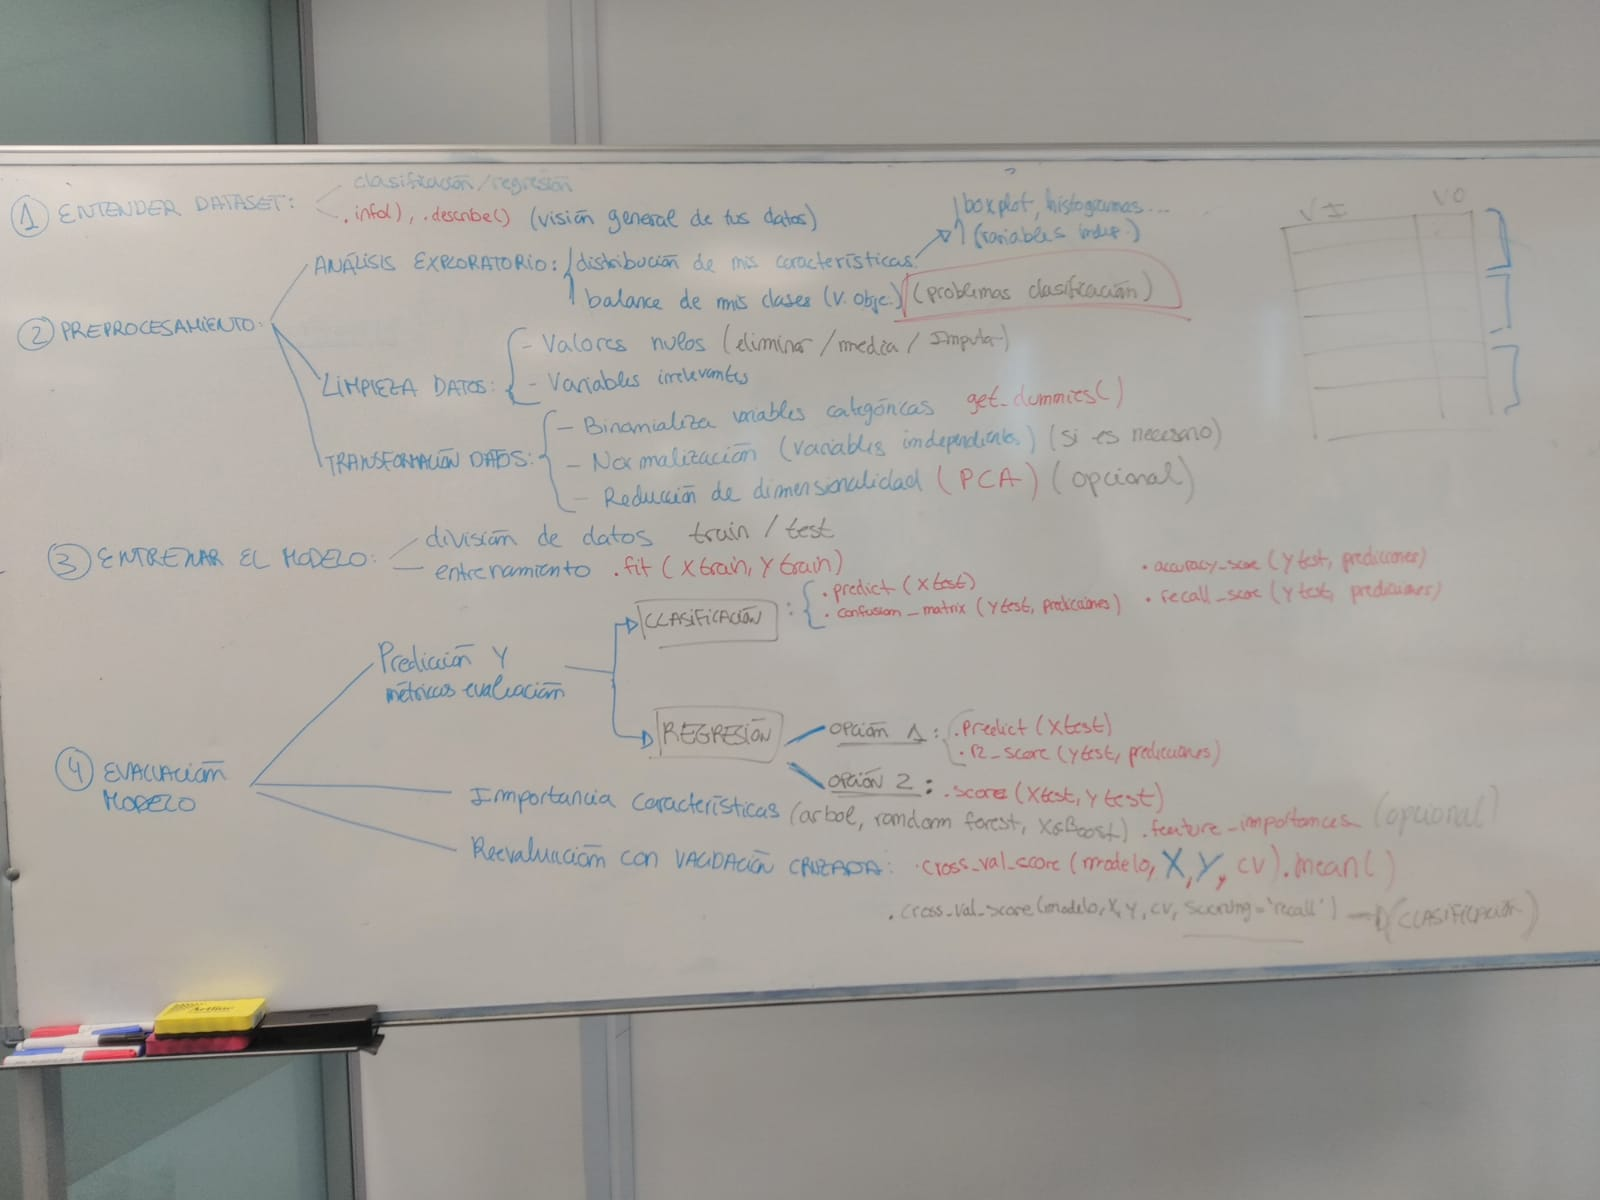

In [ ]:
import os
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("/content/sample_data/train.csv",sep=",")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## 1. ENTENDER EL DATA SET : ANALISIS PRELIMINAR

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
data.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [ ]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 2. PREPROCESAMIENTO

REEMPLAZAR VALORES NA, POR SU DECRIPCIÓN SEGÚN data_description.txt, ya que no son NA

In [ ]:
# reemplazar los valores na de la columna alley por la palabra No alley access

data['Alley'] = data['Alley'].fillna('No alley access')



In [ ]:
# reemplazar los valores na de la columna BsmtQual por no basement
data['BsmtQual'] = data['BsmtQual'].fillna('No Basement')

In [ ]:
# reemplazar los valores na de la columna  por no basement
data['BsmtCond'] = data['BsmtCond'].fillna('No Basement')

In [ ]:
# reemplazar los valores na de la columna  por no basement
data['BsmtExposure'] = data['BsmtExposure'].fillna('No Basement')

In [ ]:
# reemplazar los valores na de la columna  por no basement
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('No Basement')

In [ ]:
# reemplazar los valores na de la columna  por no basement
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('No Basement')

In [ ]:
# reemplazar los valores na de la columna  por no basement
data['FireplaceQu'] = data['FireplaceQu'].fillna('No Fireplace')

In [ ]:
data['MasVnrType']=data['MasVnrType'].fillna('none')

In [ ]:
data['GarageType'] = data['GarageType'].fillna('No Garage')

In [ ]:
data['GarageFinish'] = data['GarageFinish'].fillna('No Garage')

In [ ]:
data['GarageQual'] = data['GarageQual'].fillna('No Garage')

In [ ]:
data['GarageCond'] = data['GarageCond'].fillna('No Garage')

In [ ]:
data['PoolQC'] = data['PoolQC'].fillna('No Pool')

In [ ]:
data['Fence'] = data['Fence'].fillna('No Fence')

In [ ]:
data['Fence'] = data['Fence'].fillna('No Fence')

In [ ]:
data['MiscFeature'] = data['MiscFeature'].fillna('None')

In [ ]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,MnPrv,None,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,4,2010,WD,Normal,142125


Reemplazar los datos numericos que son categóricos segun data_description.txt

In [ ]:
#MSSubClass, OverallQual, OverallCond

## 3. COMPLETAR LOS VALORES PERDIDOS DE COLUMNAS CON ITERACIÓN

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
!pip install fancyimpute

In [ ]:
data = data.drop(columns=['Electrical'])
data= data.drop(columns=['Id'])

### todavia no seguro

In [ ]:
from fancyimpute  import IterativeImputer

In [ ]:
# iterar los valores LotFrontage, MasVnrType, GarageYrBlt
from fancyimpute  import IterativeImputer
imputer=IterativeImputer(random_state=42)
data[['LotFrontage']]=imputer.fit_transform(data[['LotFrontage']])
data[['MasVnrArea']]=imputer.fit_transform(data[['MasVnrArea']])
data[['GarageYrBlt']]=imputer.fit_transform(data[['GarageYrBlt']])

In [ ]:
#verificar que todos los datos perdidos se han completado
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
data.isnull().any().any()

False

# TRANSFORMACION DE DATOS: get dummies

In [ ]:
#BINOMIALIZAR LAS VARIABLES
data = pd.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,True,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,False,False,False,True,False,False,False,False,True,False
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,False,False,False,True,False,False,False,False,True,False
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,False,False,False,True,False,False,False,False,True,False
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
# Importamos la funcion necesaria.
from sklearn.model_selection import train_test_split

In [ ]:
# Realizamos la particion dejando un 80% para entrenar y un 20% de test.
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.20)

train_data_X = X_train.drop(['SalePrice'], axis = 1)
train_data_y = X_train['SalePrice']

test_data_X = X_test.drop(['SalePrice'], axis = 1)
test_data_y = X_test['SalePrice']

In [ ]:
# Regresion Lineal
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [ ]:
regr.fit(train_data_X, train_data_y)
regr.score(train_data_X,train_data_y)

0.9472241145632099

In [ ]:
regr.coef_

array([-1.19107932e+02,  5.99160318e+01,  8.43236473e-01,  6.52203154e+03,
        5.08933672e+03,  3.00181642e+02,  1.31676640e+02,  1.29734746e+01,
        1.64928353e+01,  3.47895737e+00,  2.09535856e+00,  2.20698078e+01,
        1.95109796e+01,  2.42846851e+01, -1.37307191e+01,  3.00666449e+01,
        2.33983974e+03, -1.01913645e+03,  3.35534168e+03,  1.38268601e+03,
       -3.23829172e+03, -1.28917482e+04,  3.95588250e+02,  3.78432184e+03,
       -9.11977416e+01,  6.26115947e+03,  1.26206716e+01,  2.17669101e+01,
        2.98088464e+01,  1.85821502e+01,  3.40151678e+01,  3.37489046e+01,
        6.39498707e+03,  9.41885465e-01, -2.49418251e+02, -5.10280938e+02,
       -2.65608136e+04,  1.72547867e+04,  6.83230329e+03,  5.36915614e+03,
       -2.89543257e+03, -1.56370773e+04,  1.56370773e+04,  1.24369327e+03,
        8.76933528e+02, -2.12062680e+03,  8.76712874e+02,  1.68267042e+03,
       -4.44808281e+03,  1.88869952e+03,  3.44220263e+03,  2.36198917e+03,
       -8.50273721e+03,  

In [ ]:
# Creamos el modelo.
# Importamos la libreria necesaria.

from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Definimos el modelo y el numero maximo de ramas del arbol.
arbol = DecisionTreeRegressor(criterion='squared_error', max_depth=8, max_features=None, max_leaf_nodes=None,min_impurity_decrease=0.0,min_samples_leaf=10, min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=None, splitter='best')

In [ ]:
# Entrenamos y evaluamos con los datos de train

arbol=arbol.fit(train_data_X, train_data_y)
arbol.score(train_data_X, train_data_y)
# Realizamos la prediccion
# Evaluamos en los datos de test.

prediccionarbol = arbol.predict(test_data_X)
arbol.score(test_data_X, test_data_y)

0.7139118456306577

In [ ]:
# Random Forest #
# Definimos el modelo con todos sus parametros

from sklearn.ensemble import RandomForestRegressor

In [ ]:
RF= RandomForestRegressor(n_estimators=500, criterion='squared_error' ,max_features='sqrt' ,max_depth=500, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=None,min_impurity_decrease=0, bootstrap=True, oob_score=True, n_jobs=1, random_state=None, verbose=0, warm_start=False)

In [ ]:
RF.fit(train_data_X, train_data_y)


RandomForestRegressor(max_depth=500, max_features='sqrt',
                      min_impurity_decrease=0, min_samples_leaf=3,
                      min_samples_split=5, n_estimators=500, n_jobs=1,
                      oob_score=True)

In [ ]:
# Analizamos la fiabilidad sobre los datos utilizados para crear el modelo.

RF.score(test_data_X, test_data_y)

0.800369619924202

In [ ]:
data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,True,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,False,False,False,True,False,False,False,False,True,False
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,False,False,False,True,False,False,False,False,True,False
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,False,False,False,True,False,False,False,False,True,False
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Separamos la variable dependiente ("y") de las explicativas ("X").

y=data['SalePrice']
X = data.drop(['SalePrice'], axis = 1)

In [ ]:
# Procedemos a realizar validacion cruzada
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RF, X, y, cv=5)

print(scores.mean())

0.8372587959725095


In [ ]:
# El ultimo paso es determinar la importancia de cada una de las variables
importancias=pd.DataFrame(RF.feature_importances_)
importancias.index=(X.columns)
importancias

,0
MSSubClass,0.004963
LotFrontage,0.012979
LotArea,0.021604
OverallQual,0.081215
OverallCond,0.003310
...,...
SaleCondition_AdjLand,0.000000
SaleCondition_Alloca,0.000000
SaleCondition_Family,0.000007
SaleCondition_Normal,0.001387


In [ ]:
# XGBoost #
# En este caso tambien utilizamos validacion cruzada.

La guindilla del pastel, un Lazy, compara el score en otros modelos de regression.

In [ ]:
!pip install lazypredict
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0,ignore_warnings=True)
models, predictions = reg.fit(train_data_X, test_data_X, train_data_y, test_data_y)
models
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.width', 1000)       # Ajustar el ancho de la salida en consola
print(models.columns)
print(models)

100%|██████████| 42/42 [00:16<00:00,  2.55it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2916
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 35
[LightGBM] [Info] Start training from score 180683.353596
Index(['Adjusted R-Squared', 'R-Squared', 'RMSE', 'Time Taken'], dtype='object')
                               Adjusted R-Squared  R-Squared      RMSE  Time Taken
Model                                                                             
LinearSVR                                  275.48      -4.66 199154.04        0.10
MLPRegressor                               273.22      -4.61 198331.05        3.06
KernelRidge                                245.98      -4.05 188146.87        0.80
GaussianProcessRegressor                   228.00      -3.68 181112.36        0.93
QuantileReg